In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
from textwrap import wrap
from matplotlib import pyplot as plt
from TCGA_files import *
from ensembleAPI import geneinfo, genesinfo
from IPython.display import HTML
from sklearn import metrics

In [2]:
cases_endpt = 'https://api.gdc.cancer.gov/cases'
fields = [
    "submitter_id",
    "case_id",
    "primary_site",
    "disease_type",
    "diagnoses.tumor_stage",
    "diagnoses.tumor_grade",
    "diagnoses.primary_diagnosis",
    "diagnoses.classification_of_tumor",
    "annotations.classification",
    "samples.tumor_code"
    ]
fields = ','.join(fields)

# query file

See https://docs.gdc.cancer.gov/API/Users_Guide/Appendix_A_Available_Fields/#file-fields for possible *fields*

In [3]:
queryFile('007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz')

quering...007f49fe-d251-4ae4-9313-86d765b13499.FPKM.txt.gz


,samples.0.tumor_code,disease_type,samples.1.tumor_code,submitter_id,diagnoses.0.classification_of_tumor,case_id,primary_site,diagnoses.0.tumor_grade,diagnoses.0.primary_diagnosis,diagnoses.0.tumor_stage,id
0,,Complex Mixed and Stromal Neoplasms,,TCGA-NA-A4QV,not reported,cdde118f-4673-4e7e-b965-1f9fe007050d,"Uterus, NOS",not reported,"Carcinosarcoma, NOS",not reported,cdde118f-4673-4e7e-b965-1f9fe007050d


In [4]:
df_files = pd.read_csv("files.txt", index_col=[0], header=[0])

## query many

In [ ]:
files = []

In [9]:
level = 0
setup = 'overlap_1000doc_0.5occ_thr'
#setup='1000dococc2000fpkmthr'
label = 'disease_type'
#label='primary_site'
df_clusters = pd.read_csv("results/hSBM/%s/topsbm/topsbm_level_%d_clusters.csv"%(setup, level), header=[0])

In [10]:
cluster={}
for i,c in enumerate(df_clusters.columns):
    cluster[i]=df_clusters[c].dropna().values

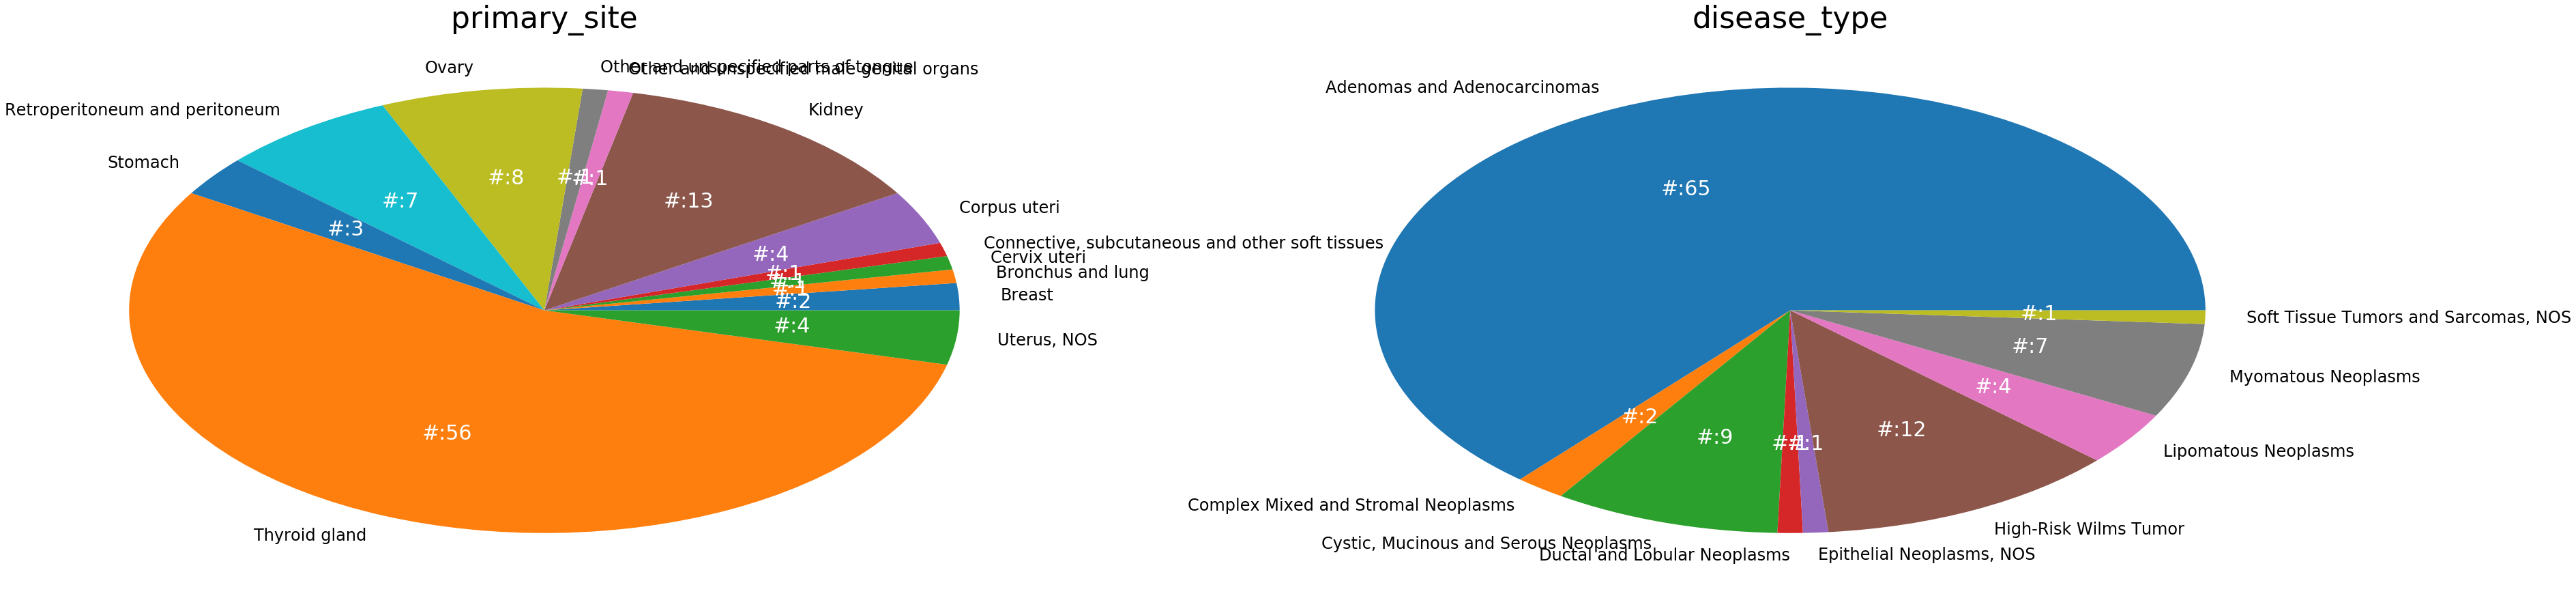

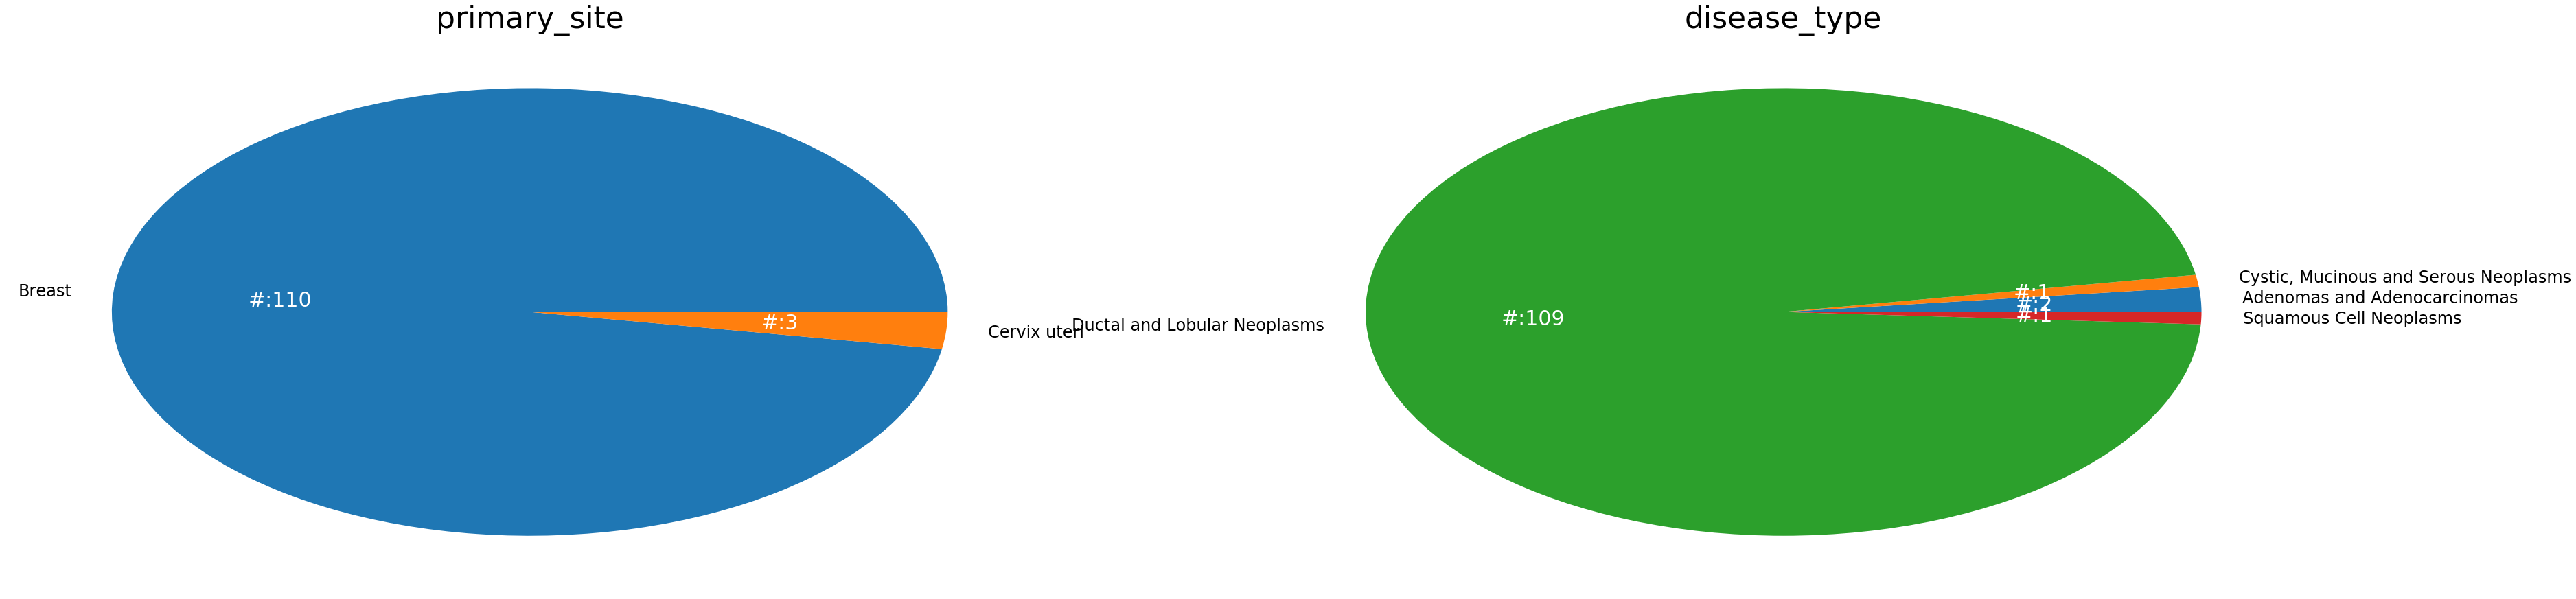

In [83]:
for c in cluster:
    print(c)
    #datatotest = queryFiles([f[0][:]+".FPKM.txt.gz" for f in cluster[c]])
    datatotest = pd.DataFrame(data=df_files.loc[[f for f in cluster[c]]], columns=df_files.columns)
    makePie(datatotest, level, c, ['primary_site','disease_type'])

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [132]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        true_labels.append(df_files.loc[sample][label])
        predicted_labels.append(c)

0
1
2
3
4
5


In [133]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [134]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)

In [135]:
series_metrics

AdjustedRandIndex    0.122197
MI                   0.364322
Homogeneity          0.339044
Completness          0.393673
Vmeasure             0.364322
Fowlkes-Mallows      0.302553
Name: overlap_1000dococc2000thrlevel_1_disease_type, dtype: float64

In [136]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [137]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    pass

In [7]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

,AdjustedRandIndex,MI,Homogeneity,Completness,Vmeasure,Fowlkes-Mallows
1000doc_0.5occ_fpkmweight_thr__level_2_primary_site,0.56,0.74,0.79,0.70,0.74,0.59
1000doc_0.5occ_fpkmweight_thr__level_3_primary_site,0.59,0.70,0.64,0.77,0.70,0.62
1000doc_0.5occ_fpkmweight_thr__level_1_primary_site,0.22,0.69,0.89,0.57,0.69,0.34
overlap_1000doc_0.5occ_thr__level_0_primary_site,0.52,0.69,0.68,0.70,0.69,0.54
1000doc_0.5occ_fpkmweight_thr__level_3_disease_type,0.28,0.57,0.65,0.50,0.57,0.42
1000doc_0.5occ_fpkmweight_thr__level_2_disease_type,0.17,0.56,0.78,0.44,0.56,0.32
overlap_1000doc_0.5occ_thr__level_0_disease_type,0.19,0.53,0.67,0.44,0.53,0.33
overlap_1000doc_0.5occ_thr__level_1_primary_site,0.26,0.52,0.40,0.73,0.52,0.39
1000doc_0.5occ_fpkmweight_thr__level_1_disease_type,0.05,0.52,0.89,0.36,0.52,0.18
overlap_1000doc_0.5occ_thr__level_1_disease_type,0.12,0.36,0.34,0.39,0.36,0.30


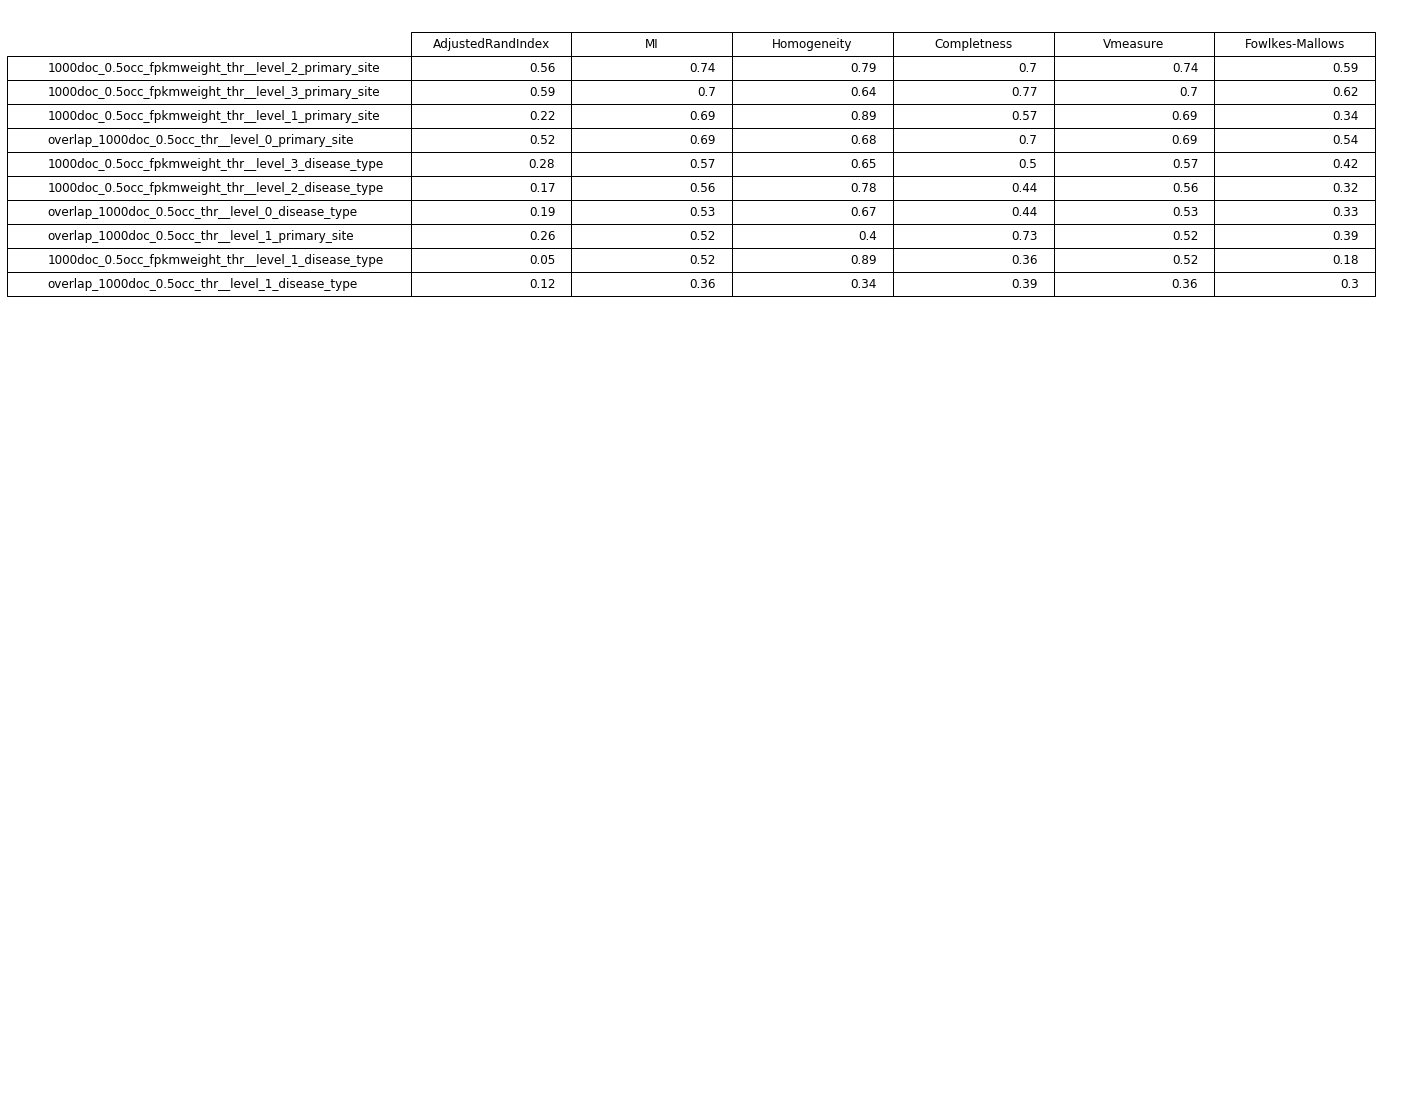

In [8]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [119]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

array([[ 4,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0, 17,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 4,  1,  0, ...,  0,  0,  0]])